# Spaceship Titanic Competition

[Link_to_competition](https://www.kaggle.com/competitions/spaceship-titanic)

In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'

In [2]:
!kaggle competitions download -c spaceship-titanic

spaceship-titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
from zipfile import ZipFile
with ZipFile('spaceship-titanic.zip') as f:
    f.extractall('spaceship_titanic_data')

In [4]:
import pandas as pd

In [5]:
raw_df = pd.read_csv('spaceship_titanic_data/train.csv')
test_df = pd.read_csv('spaceship_titanic_data/test.csv')
sample_sub_df = pd.read_csv('spaceship_titanic_data/sample_submission.csv')

In [6]:
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [7]:
raw_df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

## Explore the data

In [8]:
raw_df.groupby('HomePlanet')['Transported'].mean()

HomePlanet
Earth     0.423946
Europa    0.658846
Mars      0.523024
Name: Transported, dtype: float64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

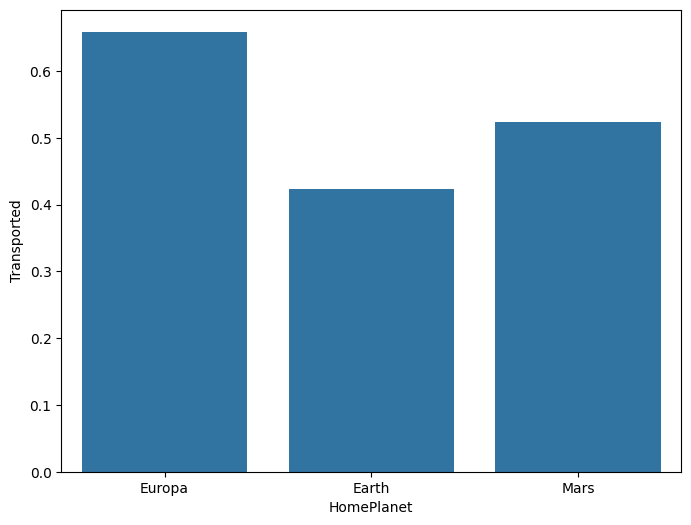

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(data=raw_df, x='HomePlanet', y='Transported', errorbar=None);

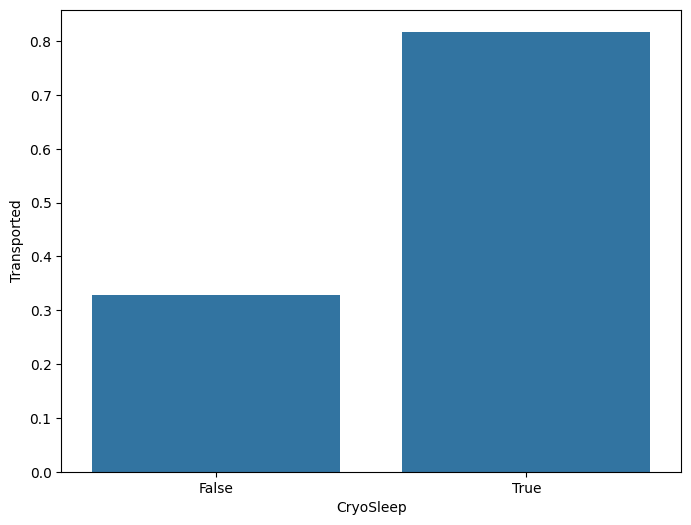

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=raw_df, x='CryoSleep', y='Transported', errorbar=None);

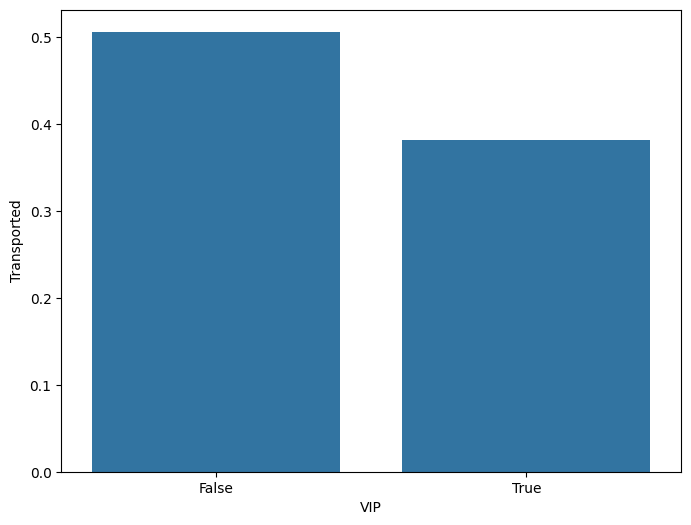

In [12]:
plt.figure(figsize=(8,6))
sns.barplot(data=raw_df, x='VIP', y='Transported', errorbar=None);

In [13]:
raw_df['GroupId'] = raw_df['PassengerId'].map(lambda x: x[0:4])
raw_df['NumWithinGroup'] = raw_df['PassengerId'].map(lambda x: x[5:])

In [14]:
raw_df[['GroupId', 'NumWithinGroup']]

,GroupId,NumWithinGroup
0,0001,01
1,0002,01
2,0003,01
3,0003,02
4,0004,01
...,...,...
8688,9276,01
8689,9278,01
8690,9279,01
8691,9280,01


In [15]:
group_count = raw_df['GroupId'].value_counts()

In [16]:
big_group = []
small_group = []
for i in group_count.index:
    if group_count.get(i) >= 3:
        big_group.append(i)

In [17]:
len(big_group)

571

In [18]:
raw_df['BigGroup'] = raw_df['GroupId'].map(lambda x: x in big_group)

<Axes: xlabel='BigGroup', ylabel='Transported'>

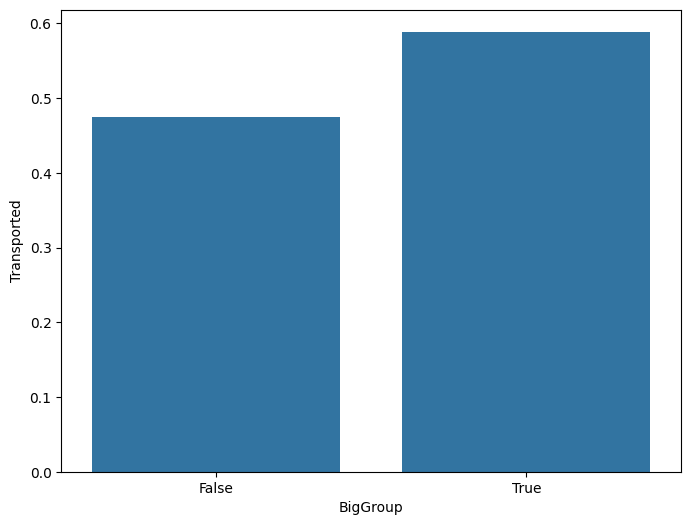

In [19]:
plt.figure(figsize=(8,6))
sns.barplot(raw_df, x='BigGroup', y='Transported', errorbar=None)

## Preproccessing

In [20]:
raw_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
Name: count, dtype: int64

In [21]:
raw_df.fillna({'HomePlanet': 'UNK'}, inplace=True)

In [22]:
raw_df['HomePlanet'].value_counts()

HomePlanet
Earth     4602
Europa    2131
Mars      1759
UNK        201
Name: count, dtype: int64

In [23]:
raw_df.fillna({'CryoSleep': 'Unk'}, inplace=True)

In [24]:
raw_df.fillna({'Cabin': 'UNK/0/UNK'}, inplace=True)

In [25]:
raw_df['Cabin'].value_counts()

Cabin
UNK/0/UNK    199
G/734/S        8
C/137/S        7
B/201/P        7
G/109/P        7
            ... 
G/556/P        1
E/231/S        1
G/545/S        1
G/543/S        1
C/178/S        1
Name: count, Length: 6561, dtype: int64

In [26]:
raw_df['Deck'] = raw_df['Cabin'].map(lambda x: x.split('/')[0])
raw_df['NumOfDeck'] = raw_df['Cabin'].map(lambda x: x.split('/')[1])
raw_df['Side'] = raw_df['Cabin'].map(lambda x: x.split('/')[2])

In [27]:
raw_df['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [28]:
raw_df.fillna({'Destination': 'UNK'}, inplace=True)

In [29]:
raw_df['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [30]:
raw_df.fillna({'VIP': False}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12296\2747767893.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  raw_df.fillna({'VIP': False}, inplace=True)


In [31]:
raw_df['VIP'].value_counts()

VIP
False    8494
True      199
Name: count, dtype: int64

In [32]:
numeric_cols = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Age']

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer()

In [35]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [36]:
raw_df[numeric_cols] = imputer.transform(raw_df[numeric_cols])

In [37]:
raw_df[numeric_cols].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Age             0
dtype: int64

In [38]:
numeric_cols.remove('Age')

In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
scaler = MinMaxScaler()

In [41]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [42]:
raw_df[numeric_cols] = scaler.transform(raw_df[numeric_cols])
raw_df[numeric_cols].describe()

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,0.015683,0.015365,0.007395,0.013885,0.012632
std,0.046049,0.053481,0.025431,0.050191,0.046959
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.005444,0.003958,0.001916,0.003972,0.002942
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
raw_df['AgeGroup'] = pd.cut(raw_df['Age'], 
                            bins=[-1,5,14,18,30,60,100],
                            labels=['Baby','Child','Teenager','Adult','OldAdult','Old'])

In [44]:
raw_df['AgeGroup'].value_counts()

AgeGroup
Adult       3417
OldAdult    3191
Teenager     780
Child        586
Baby         499
Old          220
Name: count, dtype: int64

In [45]:
raw_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,GroupId,NumWithinGroup,BigGroup,Deck,NumOfDeck,Side,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,...,0.000000,Maham Ofracculy,False,0001,01,False,B,0,P,OldAdult
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,0.007608,0.000302,0.001064,...,0.001823,Juanna Vines,True,0002,01,False,F,0,S,Adult
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,0.003001,0.119948,0.000000,...,0.002030,Altark Susent,False,0003,01,False,A,0,S,OldAdult
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.000000,0.043035,0.015793,...,0.007997,Solam Susent,False,0003,02,False,A,0,S,OldAdult
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,0.021149,0.002348,0.006428,...,0.000083,Willy Santantines,True,0004,01,False,F,1,S,Teenager
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.000000,0.228726,0.000000,...,0.003066,Gravior Noxnuther,False,9276,01,False,A,98,P,OldAdult
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.000000,0.000000,0.000000,...,0.000000,Kurta Mondalley,False,9278,01,False,G,1499,S,Teenager
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.000000,0.000000,0.079687,...,0.000000,Fayey Connon,True,9279,01,False,G,1500,S,Adult
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.000000,0.035186,0.000000,...,0.134049,Celeon Hontichre,False,9280,01,False,E,608,S,OldAdult


In [46]:
categorical_cols = ['HomePlanet','CryoSleep','Destination','VIP','BigGroup','Deck','Side','AgeGroup']

In [47]:
input_cols = numeric_cols + categorical_cols
target_col = 'Transported'

In [48]:
inputs = raw_df[input_cols]
targets = raw_df[target_col]

In [49]:
from sklearn.preprocessing import OneHotEncoder

In [50]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [51]:
inputs[categorical_cols].dtypes

HomePlanet       object
CryoSleep        object
Destination      object
VIP                bool
BigGroup           bool
Deck             object
Side             object
AgeGroup       category
dtype: object

In [52]:
for col in categorical_cols:
    if inputs[col].dtype != 'object':
        inputs[col] = inputs[col].astype(str)
    inputs[col] = inputs[col].replace({True: 'True', False: 'False'})

C:\Users\admin\AppData\Local\Temp\ipykernel_12296\224808602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[col] = inputs[col].replace({True: 'True', False: 'False'})
C:\Users\admin\AppData\Local\Temp\ipykernel_12296\224808602.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inputs[col] = inputs[col].astype(str)
C:\Users\admin\AppData\Local\Temp\ipykernel_12296\224808602.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [53]:
inputs[categorical_cols].dtypes

HomePlanet     object
CryoSleep      object
Destination    object
VIP            object
BigGroup       object
Deck           object
Side           object
AgeGroup       object
dtype: object

In [54]:
encoder.fit(inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [55]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
encoded_cols

['HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'HomePlanet_UNK',
 'CryoSleep_False',
 'CryoSleep_True',
 'CryoSleep_Unk',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Destination_UNK',
 'VIP_False',
 'VIP_True',
 'BigGroup_False',
 'BigGroup_True',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_UNK',
 'Side_P',
 'Side_S',
 'Side_UNK',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Old',
 'AgeGroup_OldAdult',
 'AgeGroup_Teenager']

In [56]:
encoded_df = pd.DataFrame(data=encoder.transform(inputs[categorical_cols]), columns=encoded_cols)
encoded_df.index = inputs.index
encoded_df

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_UNK,CryoSleep_False,CryoSleep_True,CryoSleep_Unk,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Deck_UNK,Side_P,Side_S,Side_UNK,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Old,AgeGroup_OldAdult,AgeGroup_Teenager
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8690,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8691,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [57]:
inputs = pd.concat([inputs, encoded_df], axis=1).copy()

In [58]:
inputs = inputs[numeric_cols+encoded_cols]
inputs

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_UNK,CryoSleep_False,...,Deck_UNK,Side_P,Side_S,Side_UNK,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Old,AgeGroup_OldAdult,AgeGroup_Teenager
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8689,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8690,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8691,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [59]:
targets.value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [60]:
targets = targets.map({True: 1, False: 0})

In [61]:
targets.value_counts()

Transported
1    4378
0    4315
Name: count, dtype: int64

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
train_inputs, val_inputs, train_targets, val_targets = train_test_split(inputs, targets,
                                                                        test_size=0.2, random_state=42)

## Model and training model

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [65]:
classifier = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(n_jobs=-1),
    'XGB': XGBClassifier(n_jobs=-1)
}
result = {'Classifier': [], 'Accurary': []}

In [66]:
from sklearn.metrics import accuracy_score

In [67]:
for clf_name, clf in classifier.items():
    clf.fit(train_inputs, train_targets)
    preds = clf.predict(val_inputs)
    acc = accuracy_score(val_targets, preds)
    result['Classifier'].append(clf_name)
    result['Accurary'].append(acc)
result_df = pd.DataFrame(result)
result_df

,Classifier,Accurary
0,LogisticRegression,0.771133
1,DecisionTree,0.752156
2,RandomForest,0.786084
3,XGB,0.791259


### Random Forest Model

In [68]:
def test_params(**params):
    model = RandomForestClassifier(**params)
    model.fit(train_inputs, train_targets)
    train_acc = model.score(train_inputs, train_targets)
    val_acc = model.score(val_inputs, val_targets)
    return train_acc, val_acc

In [69]:
test_params(n_jobs=-1)

(0.9381650848432557, 0.78953421506613)

In [70]:
for i in [5,10,30,50,100,200,300,600]:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 5: train_acc = 0.920190, val_acc = 0.770558
Test 10: train_acc = 0.926949, val_acc = 0.782634
Test 30: train_acc = 0.937015, val_acc = 0.781484
Test 50: train_acc = 0.937877, val_acc = 0.788959
Test 100: train_acc = 0.938165, val_acc = 0.784359
Test 200: train_acc = 0.938165, val_acc = 0.788384
Test 300: train_acc = 0.938165, val_acc = 0.789534
Test 600: train_acc = 0.938165, val_acc = 0.785509


In [71]:
for i in [0,42,1212,None]:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 0: train_acc = 0.938165, val_acc = 0.782634
Test 42: train_acc = 0.938165, val_acc = 0.783209
Test 1212: train_acc = 0.938165, val_acc = 0.782634
Test None: train_acc = 0.938165, val_acc = 0.785509


In [72]:
for i in [2, 4, 6, 9, 12, 16, 21, 30, 40]:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 2: train_acc = 0.741588, val_acc = 0.738355
Test 4: train_acc = 0.757118, val_acc = 0.748131
Test 6: train_acc = 0.794507, val_acc = 0.771133
Test 9: train_acc = 0.839517, val_acc = 0.782634
Test 12: train_acc = 0.876905, val_acc = 0.790109
Test 16: train_acc = 0.917889, val_acc = 0.789534
Test 21: train_acc = 0.937734, val_acc = 0.780334
Test 30: train_acc = 0.938165, val_acc = 0.784359
Test 40: train_acc = 0.938165, val_acc = 0.782634


In [73]:
for i in ['sqrt','log2',None]:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test sqrt: train_acc = 0.876905, val_acc = 0.790109
Test log2: train_acc = 0.875180, val_acc = 0.791259
Test None: train_acc = 0.875755, val_acc = 0.786084


In [74]:
for i in ['gini','entropy']:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features='log2', criterion=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test gini: train_acc = 0.875180, val_acc = 0.791259
Test entropy: train_acc = 0.870003, val_acc = 0.791834


In [75]:
for i in range(5,20,2):
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features='log2', criterion='entropy',
                                     min_samples_split=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 5: train_acc = 0.861087, val_acc = 0.792409
Test 7: train_acc = 0.856773, val_acc = 0.791834
Test 9: train_acc = 0.853466, val_acc = 0.788959
Test 11: train_acc = 0.851021, val_acc = 0.794710
Test 13: train_acc = 0.848864, val_acc = 0.790684
Test 15: train_acc = 0.848001, val_acc = 0.793560
Test 17: train_acc = 0.843975, val_acc = 0.791834
Test 19: train_acc = 0.843399, val_acc = 0.787234


In [76]:
for i in range(1,6):
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features='log2', criterion='entropy',
                                     min_samples_split=11, min_samples_leaf=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 1: train_acc = 0.851021, val_acc = 0.794710
Test 2: train_acc = 0.847282, val_acc = 0.792984
Test 3: train_acc = 0.845413, val_acc = 0.791834
Test 4: train_acc = 0.838223, val_acc = 0.786084
Test 5: train_acc = 0.837072, val_acc = 0.787234


In [77]:
for i in range(65,120,4):
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features='log2', criterion='entropy',
                                     min_samples_split=11, min_samples_leaf=1,
                                     max_leaf_nodes=i)
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 65: train_acc = 0.811907, val_acc = 0.784934
Test 69: train_acc = 0.812913, val_acc = 0.782059
Test 73: train_acc = 0.814208, val_acc = 0.782634
Test 77: train_acc = 0.816796, val_acc = 0.786659
Test 81: train_acc = 0.818378, val_acc = 0.786084
Test 85: train_acc = 0.819816, val_acc = 0.785509
Test 89: train_acc = 0.820679, val_acc = 0.787234
Test 93: train_acc = 0.821542, val_acc = 0.786659
Test 97: train_acc = 0.823123, val_acc = 0.788959
Test 101: train_acc = 0.823123, val_acc = 0.787809
Test 105: train_acc = 0.824274, val_acc = 0.787809
Test 109: train_acc = 0.825568, val_acc = 0.786659
Test 113: train_acc = 0.826431, val_acc = 0.787234
Test 117: train_acc = 0.827006, val_acc = 0.785509


In [78]:
for i in [1,1.1,1.25,1.5,1.8,2,2.5]:
    train_acc, val_acc = test_params(n_jobs=-1, n_estimators=200,
                                     random_state=42, max_depth=12,
                                     max_features='log2', criterion='entropy',
                                     min_samples_split=11, min_samples_leaf=1,
                                     max_leaf_nodes=97, class_weight={0: 1, 1: i})
    print("Test {}: train_acc = {:6f}, val_acc = {:6f}".format(i, train_acc, val_acc))

Test 1: train_acc = 0.823123, val_acc = 0.788959
Test 1.1: train_acc = 0.827869, val_acc = 0.788959
Test 1.25: train_acc = 0.830026, val_acc = 0.786084
Test 1.5: train_acc = 0.829451, val_acc = 0.784934
Test 1.8: train_acc = 0.826718, val_acc = 0.782059
Test 2: train_acc = 0.824418, val_acc = 0.778608
Test 2.5: train_acc = 0.811332, val_acc = 0.772858


In [79]:
best_rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=200,
                                       random_state=42, max_depth=12,
                                       max_features='log2', criterion='entropy',
                                       min_samples_split=11, min_samples_leaf=1,
                                       max_leaf_nodes=97, class_weight={0: 1, 1: 1.1})

In [80]:
best_rf_model.fit(train_inputs, train_targets)

RandomForestClassifier(class_weight={0: 1, 1: 1.1}, criterion='entropy',
                       max_depth=12, max_features='log2', max_leaf_nodes=97,
                       min_samples_split=11, n_estimators=200, n_jobs=-1,
                       random_state=42)

In [81]:
best_rf_model.score(train_inputs, train_targets)

0.8278688524590164

In [82]:
best_rf_model.score(val_inputs, val_targets)

0.7889591719378953

In [83]:
test_df[numeric_cols+['Age']].isna().sum()

RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Age              91
dtype: int64

In [84]:
test_df[numeric_cols+['Age']] = imputer.transform(test_df[numeric_cols+['Age']])
test_df[numeric_cols+['Age']].isna().sum()

RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Age             0
dtype: int64

In [85]:
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

In [86]:
test_df.isna().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age               0
VIP              93
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name             94
dtype: int64

In [87]:
encoded_cols

['HomePlanet_Earth',
 'HomePlanet_Europa',
 'HomePlanet_Mars',
 'HomePlanet_UNK',
 'CryoSleep_False',
 'CryoSleep_True',
 'CryoSleep_Unk',
 'Destination_55 Cancri e',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Destination_UNK',
 'VIP_False',
 'VIP_True',
 'BigGroup_False',
 'BigGroup_True',
 'Deck_A',
 'Deck_B',
 'Deck_C',
 'Deck_D',
 'Deck_E',
 'Deck_F',
 'Deck_G',
 'Deck_T',
 'Deck_UNK',
 'Side_P',
 'Side_S',
 'Side_UNK',
 'AgeGroup_Adult',
 'AgeGroup_Baby',
 'AgeGroup_Child',
 'AgeGroup_Old',
 'AgeGroup_OldAdult',
 'AgeGroup_Teenager']

In [88]:
test_df.fillna({'HomePlanet': 'UNK',
                'CryoSleep': 'Unk',
                'Destination': 'UNK',
                'VIP': False,
                'Cabin': 'UNK/0/UNK'}, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_12296\2214468939.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test_df.fillna({'HomePlanet': 'UNK',


In [89]:
test_df.isna().sum()

PassengerId      0
HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age              0
VIP              0
RoomService      0
FoodCourt        0
ShoppingMall     0
Spa              0
VRDeck           0
Name            94
dtype: int64

In [90]:
test_df['Deck'] = test_df['Cabin'].map(lambda x: x.split('/')[0])
test_df['NumOfDeck'] = test_df['Cabin'].map(lambda x: x.split('/')[1])
test_df['Side'] = test_df['Cabin'].map(lambda x: x.split('/')[2])

In [91]:
test_df['GroupId'] = test_df['PassengerId'].map(lambda x: x[0:4])
big_group = []
group_count = test_df['GroupId'].value_counts()
for i in group_count.index:
    if group_count.get(i) >= 3:
        big_group.append(i)

In [92]:
test_df['BigGroup'] = test_df['GroupId'].map(lambda x: x in big_group)

In [93]:
test_df['AgeGroup'] = pd.cut(test_df['Age'], 
                            bins=[-1,5,14,18,30,60,100],
                            labels=['Baby','Child','Teenager','Adult','OldAdult','Old'])

In [94]:
test_df[categorical_cols]

,HomePlanet,CryoSleep,Destination,VIP,BigGroup,Deck,Side,AgeGroup
0,Earth,True,TRAPPIST-1e,False,False,G,S,Adult
1,Earth,False,TRAPPIST-1e,False,False,F,S,Adult
2,Europa,True,55 Cancri e,False,False,C,S,OldAdult
3,Europa,False,TRAPPIST-1e,False,False,C,S,OldAdult
4,Earth,False,TRAPPIST-1e,False,False,F,S,Adult
...,...,...,...,...,...,...,...,...
4272,Earth,True,TRAPPIST-1e,False,False,G,S,OldAdult
4273,Earth,False,TRAPPIST-1e,False,False,UNK,UNK,OldAdult
4274,Mars,True,55 Cancri e,False,False,D,P,Adult
4275,Europa,False,UNK,False,False,D,P,Adult


In [95]:
test_df[categorical_cols].dtypes

HomePlanet       object
CryoSleep        object
Destination      object
VIP                bool
BigGroup           bool
Deck             object
Side             object
AgeGroup       category
dtype: object

In [96]:
for col in categorical_cols:
    if test_df[col].dtype != 'object':
        test_df[col] = test_df[col].astype(str)
    test_df[col] = test_df[col].replace({True: 'True', False: 'False'})

In [97]:
test_df[categorical_cols].dtypes

HomePlanet     object
CryoSleep      object
Destination    object
VIP            object
BigGroup       object
Deck           object
Side           object
AgeGroup       object
dtype: object

In [98]:
encoded_df = pd.DataFrame(data=encoder.transform(test_df[categorical_cols]), columns=encoded_cols)
encoded_df.index = test_df.index
encoded_df

,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_UNK,CryoSleep_False,CryoSleep_True,CryoSleep_Unk,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,...,Deck_UNK,Side_P,Side_S,Side_UNK,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Old,AgeGroup_OldAdult,AgeGroup_Teenager
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4274,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4275,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [99]:
test_df = pd.concat([test_df, encoded_df], axis=1).copy()
test_inputs = test_df[numeric_cols+encoded_cols]
test_inputs

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,HomePlanet_UNK,CryoSleep_False,...,Deck_UNK,Side_P,Side_S,Side_UNK,AgeGroup_Adult,AgeGroup_Baby,AgeGroup_Child,AgeGroup_Old,AgeGroup_OldAdult,AgeGroup_Teenager
0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000302,0.000000,0.125982,0.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.000000,0.223124,0.000000,0.008077,0.024241,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000698,0.000000,0.027030,0.000000,0.000000,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4273,0.000000,0.028410,0.000724,0.000446,0.005967,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4274,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4275,0.000000,0.089894,0.000000,0.000000,0.021672,0.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [100]:
test_preds = best_rf_model.predict(test_inputs)

In [101]:
test_preds = pd.Series(test_preds)

In [102]:
test_preds = test_preds.astype(bool)

In [103]:
test_preds

0        True
1       False
2        True
3        True
4        True
        ...  
4272     True
4273    False
4274     True
4275     True
4276     True
Length: 4277, dtype: bool

In [104]:
accuracy_score(sample_sub_df['Transported'], test_preds)

0.4980126256722001

In [105]:
sample_sub_df['Transported'] = test_preds

In [106]:
sample_sub_df.to_csv('spaceship_titanic_data/rf_submission.csv', index=None)

### XGBClassifier

In [ ]:
def test_params(**params):
    model = XGBClassifier(**params)
    model.fit(train_inputs, train_targets)
    train_acc = model.score(train_inputs, train_targets)
    val_acc = model.score(val_inputs, val_targets)
    return train_acc, val_acc